<a href="https://colab.research.google.com/github/ylnrahma/FACE_2025/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DETEKSI WAJAH**

Nama : Yuliyana Rahmawati <br>
NIM  : 2141720241


1. Menginstal Dua Pustaka Python




In [1]:
!pip install opencv-python-headless geopy

2. Mengimpor Beberapa Pustaka Python

In [2]:
import os
import cv2
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt

3. Menghubungkan Google Colab dengan Google Drive, sehingga file yang ada di Google Drive dapat diakses dan digunakan langsung dalam notebook Colab

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


4. Menampilkan semua dataset

Dataset berisi 8 gambar.


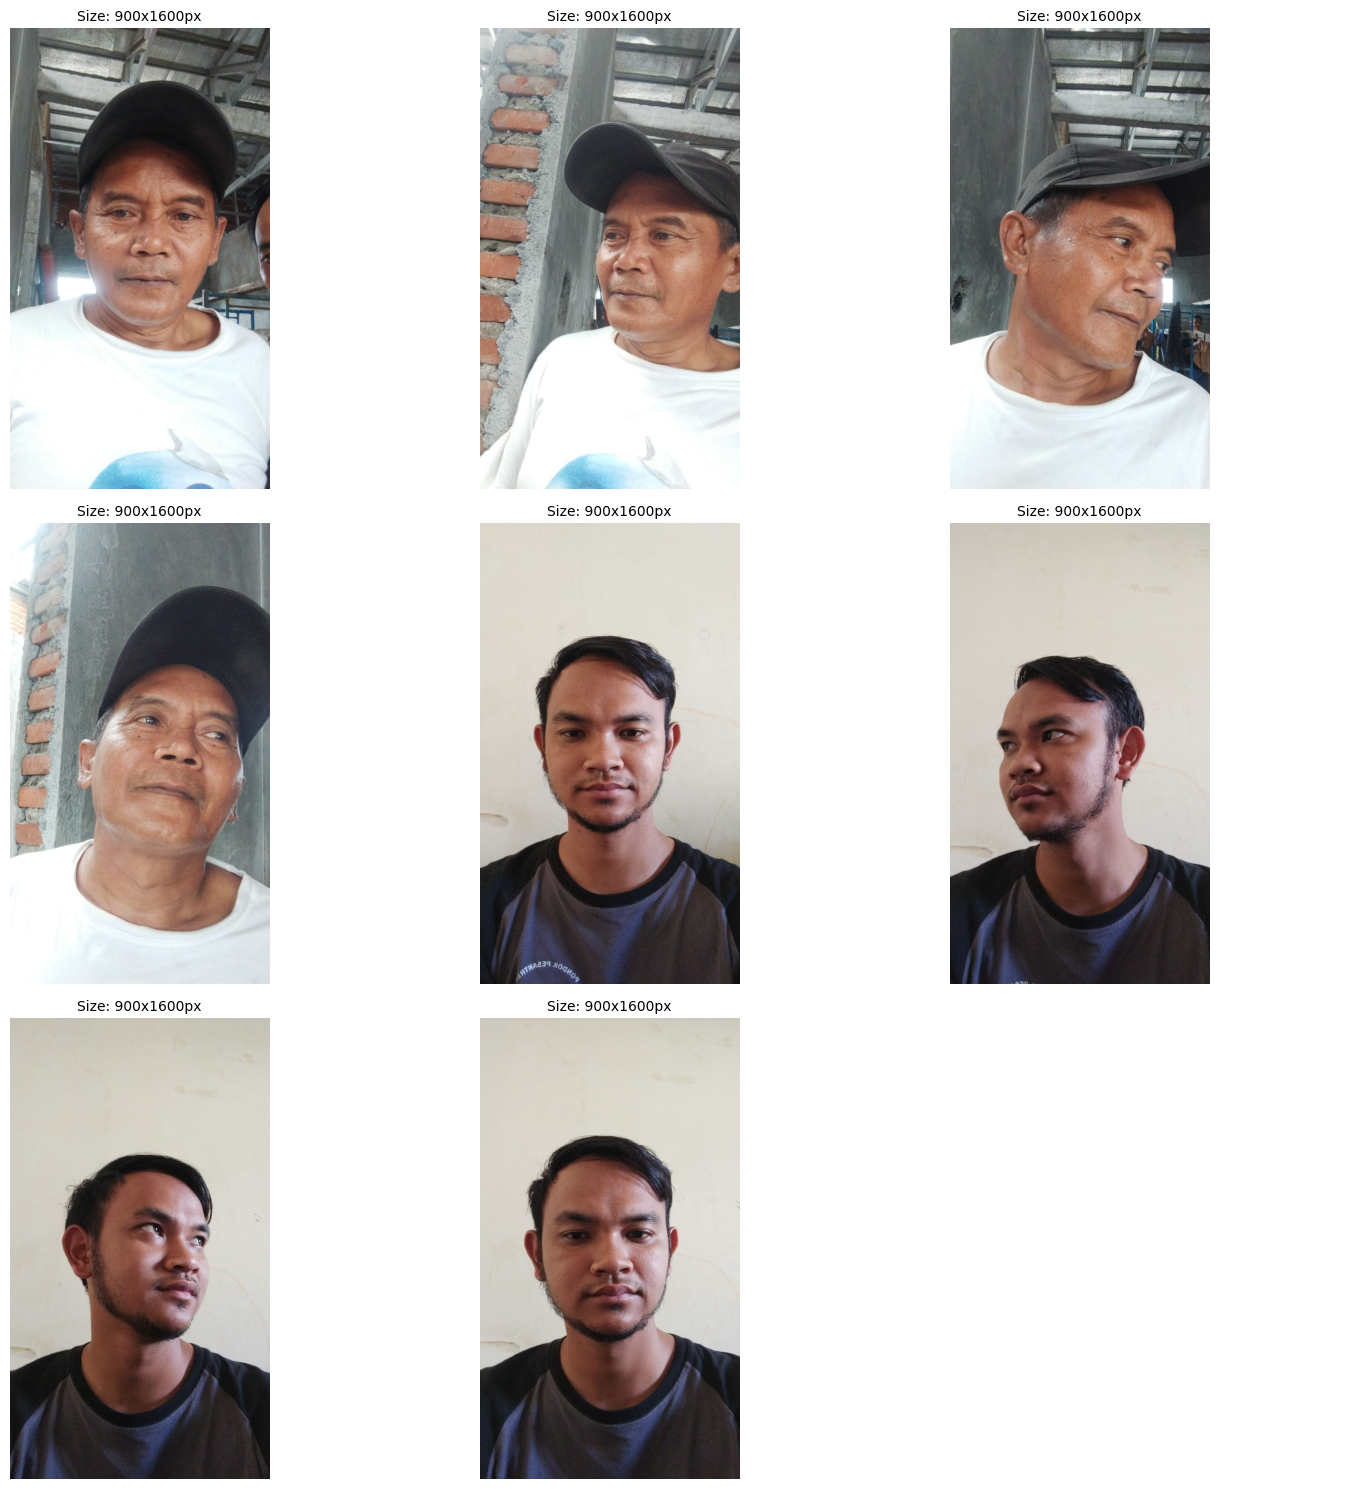

In [4]:
# Path ke folder dataset di Google Drive
dataset_path = '/content/drive/MyDrive/DATASET'

# List semua file dalam folder dataset dengan ekstensi .jpg atau .png
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

# Menampilkan jumlah gambar dalam dataset
print(f"Dataset berisi {len(image_files)} gambar.")

# Menentukan jumlah kolom dan baris dalam grid
num_images = len(image_files)
cols = 3  # Jumlah kolom
rows = (num_images + cols - 1) // cols  # Hitung jumlah baris secara dinamis

# Membuat grid untuk menampilkan gambar
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Mempermudah iterasi

# Menampilkan gambar dalam grid
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)  # Membaca gambar

    # Mendapatkan dimensi gambar
    height, width, _ = img.shape  # Dimensi gambar (tinggi, lebar, jumlah kanal warna)

    # Konversi warna BGR ke RGB untuk ditampilkan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar pada subplot
    axes[i].imshow(img_rgb)
    axes[i].set_title(f"Size: {width}x{height}px", fontsize=10)
    axes[i].axis('off')  # Menyembunyikan sumbu

# Menghilangkan sumbu subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Menampilkan seluruh grid
plt.tight_layout()
plt.show()


5. Melakukan preprocessing gambar dengan dua langkah utama: resize dan grayscale untuk face recognition.

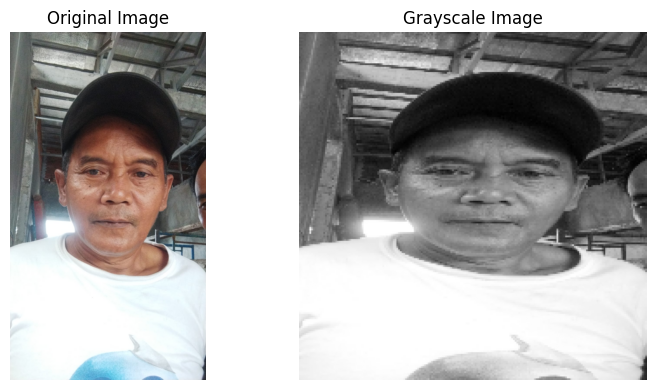

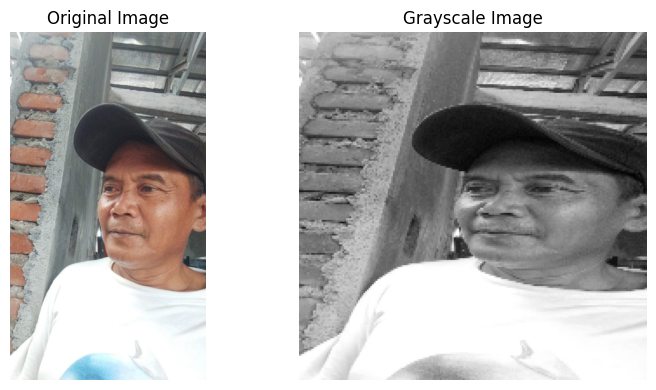

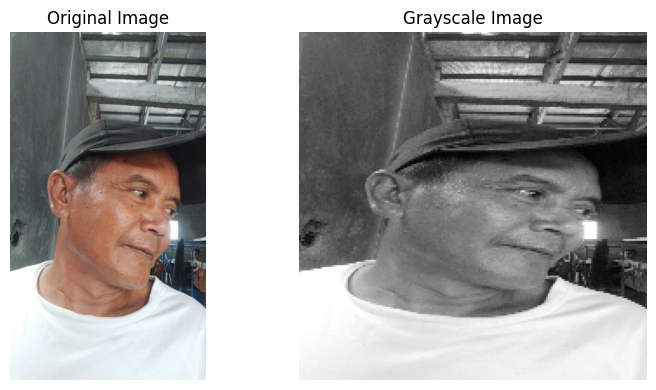

In [5]:
# Variabel untuk menyimpan gambar grayscale hasil preprocessing
preprocessed_images = []

# Preprocessing
for img_path in image_files[:3]:
    # Membaca gambar
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (200, 200))  # Resize ke 200x200
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

    # Menyimpan gambar asli dan hasil grayscale
    preprocessed_images.append((img, img_gray))

    # Menampilkan gambar asli dan hasil grayscale
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk ditampilkan
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(img_gray, cmap='gray')
    axes[1].set_title("Grayscale Image")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

6. Menentukkan Haar Feature

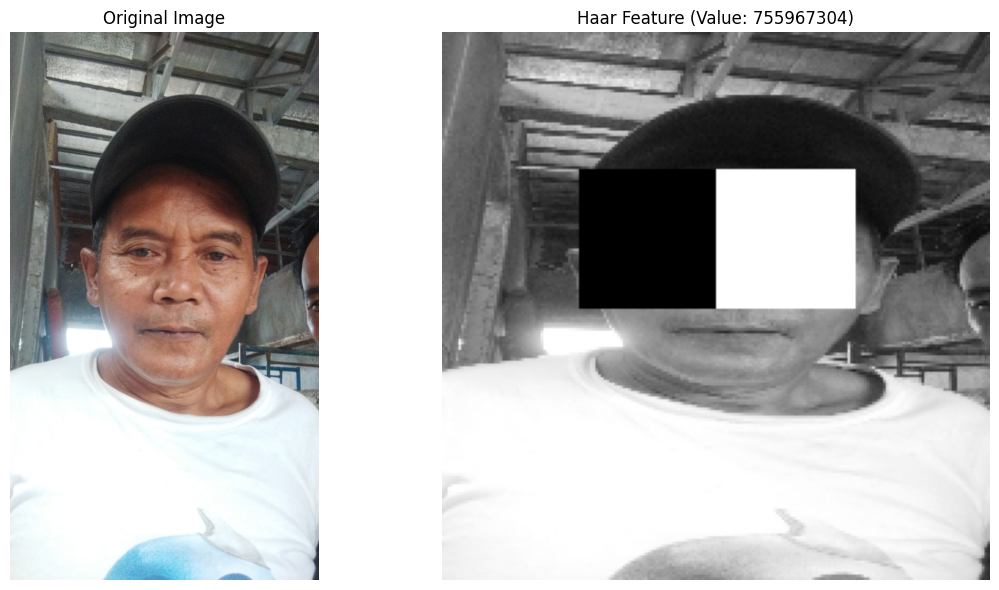

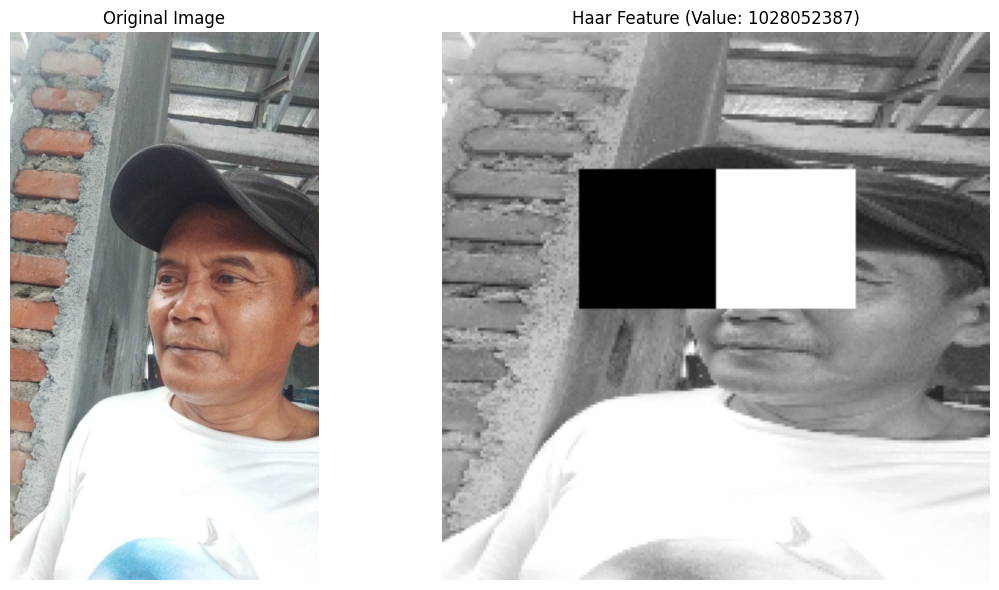

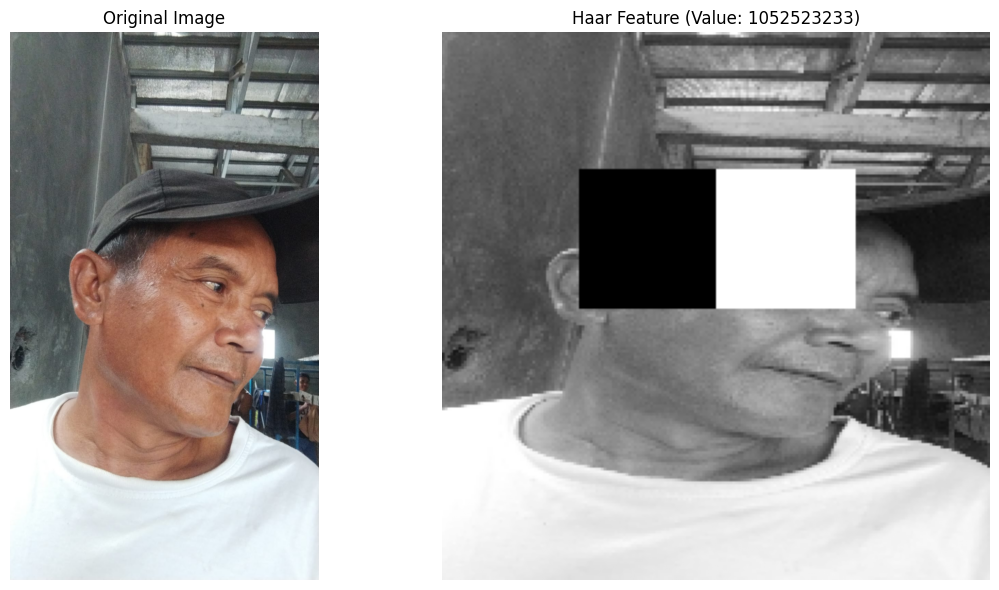


--- Analysis Summary ---
Total Images Processed: 3
Minimum Haar Feature Value: 755967304
Maximum Haar Feature Value: 1052523233
Average Haar Feature Value: 945514308.00

Detailed Results:
 Image Index  Haar Feature Value Good Feature
           0           755967304           No
           1          1028052387           No
           2          1052523233           No


In [9]:
import pandas as pd  # Untuk menampilkan hasil dalam tabel

# Fungsi untuk menghitung integral image
def integral_image(img):
    """
    Menghitung integral image dari gambar grayscale.
    """
    return cv2.integral(img)[1:, 1:]  # Menggunakan fungsi integral bawaan OpenCV

# Fungsi untuk menghitung Haar feature
def haar_feature(integral_img, x, y, width, height):
    """
    Menghitung nilai Haar feature berdasarkan integral image.
    """
    black_region = integral_img[y:y+height, x:x+width//2].sum()  # Kotak hitam
    white_region = integral_img[y:y+height, x+width//2:x+width].sum()  # Kotak putih
    return white_region - black_region

# Variabel untuk menyimpan hasil Haar features
haar_values = []
good_haar_values = []  # Menyimpan nilai Haar yang "bagus"
good_images = []       # Menyimpan indeks gambar yang bagus

# Preprocessing (contoh)
preprocessed_images = []
for img_path in image_files[:3]:  # Gunakan dataset Anda
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (200, 200))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    preprocessed_images.append((img, img_gray))

# Loop untuk setiap gambar
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Koordinat dan ukuran area Haar feature
    x, y, width, height = 50, 50, 100, 50

    # Hitung nilai Haar Feature
    feature_value = haar_feature(int_img, x, y, width, height)
    haar_values.append(feature_value)

    # Tandai nilai Haar yang "bagus"
    if 140 <= feature_value <= 160:
        good_haar_values.append(feature_value)
        good_images.append(i)

    # Visualisasi
    img_visualized = img_gray.copy()
    cv2.rectangle(img_visualized, (x, y), (x + width // 2, y + height), (0, 0, 0), -1)
    cv2.rectangle(img_visualized, (x + width // 2, y), (x + width, y + height), (255, 255, 255), -1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(img_visualized, cmap='gray')
    axes[1].set_title(f"Haar Feature (Value: {feature_value})")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

# Analisis hasil
if haar_values:
    min_value = min(haar_values)
    max_value = max(haar_values)
    average_value = sum(haar_values) / len(haar_values)

    # Membuat DataFrame untuk hasil
    data = {
        "Image Index": list(range(len(haar_values))),
        "Haar Feature Value": haar_values,
        "Good Feature": ["Yes" if 140 <= v <= 160 else "No" for v in haar_values]
    }
    df = pd.DataFrame(data)

    print("\n--- Analysis Summary ---")
    print(f"Total Images Processed: {len(preprocessed_images)}")
    print(f"Minimum Haar Feature Value: {min_value}")
    print(f"Maximum Haar Feature Value: {max_value}")
    print(f"Average Haar Feature Value: {average_value:.2f}")
    print("\nDetailed Results:")
    print(df.to_string(index=False))  # Menampilkan tabel tanpa indeks
else:
    print("No Haar values were calculated.")


7. Menentukkan Integral Image

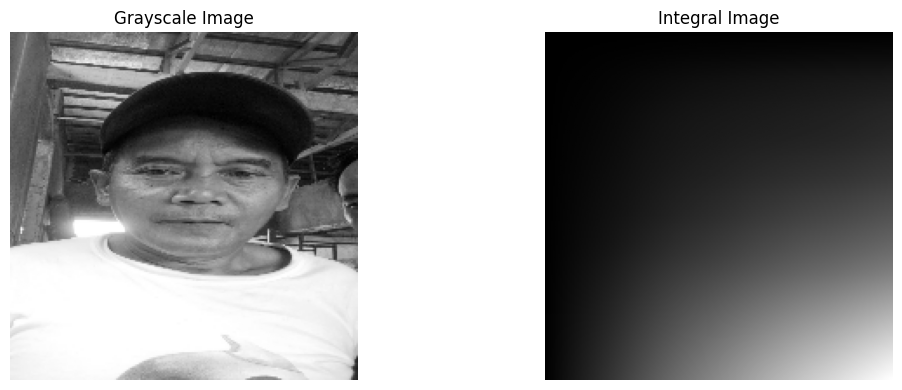

Integral Image (Partial Matrix) for Image 1:
[[  97  195  298  402  501]
 [ 201  403  605  805 1008]
 [ 305  610  914 1213 1522]
 [ 400  801 1204 1603 2020]
 [ 500 1008 1516 2014 2539]]


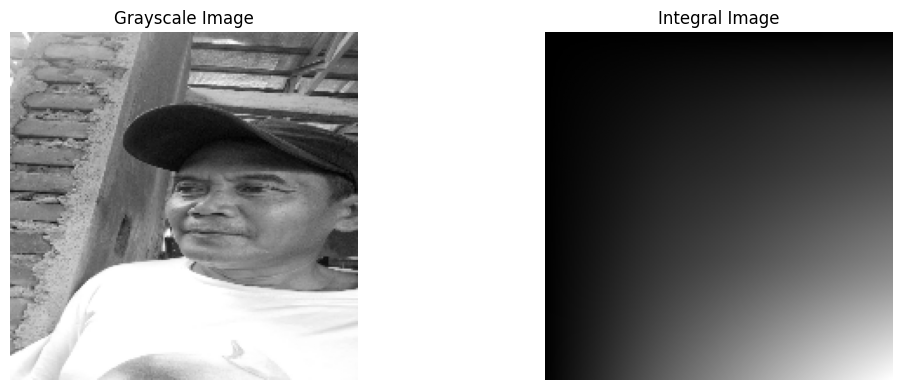

Integral Image (Partial Matrix) for Image 2:
[[ 196  393  591  789  988]
 [ 395  792 1190 1590 1991]
 [ 592 1184 1775 2367 2961]
 [ 808 1616 2428 3237 4041]
 [1031 2058 3086 4112 5132]]


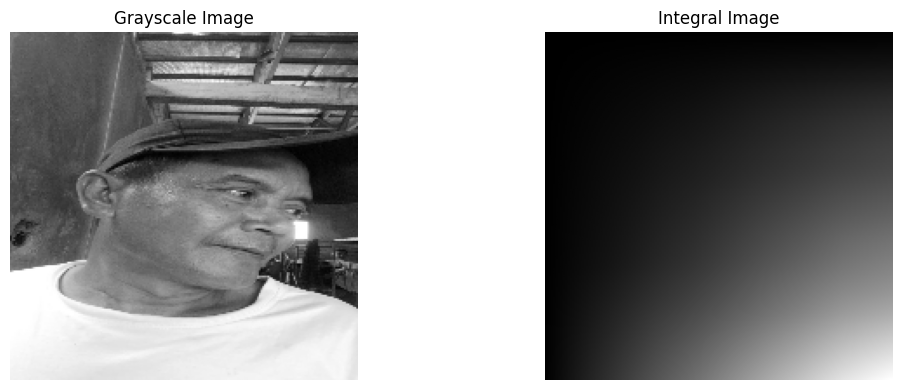

Integral Image (Partial Matrix) for Image 3:
[[ 131  261  384  514  637]
 [ 256  516  771 1036 1291]
 [ 389  774 1162 1558 1930]
 [ 515 1032 1539 2047 2527]
 [ 644 1288 1906 2524 3112]]


In [10]:
# Fungsi untuk menghitung integral image
def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1)

# Proses perhitungan integral image untuk setiap gambar grayscale
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Menampilkan gambar grayscale dan integral image
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Menggunakan 2 kolom

    axes[0].imshow(img_gray, cmap='gray')  # Menampilkan gambar grayscale
    axes[0].set_title("Grayscale Image")
    axes[0].axis('off')

    axes[1].imshow(int_img, cmap='gray')  # Menampilkan integral image
    axes[1].set_title("Integral Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Menampilkan nilai integral sebagian kecil matriks untuk ilustrasi
    print(f"Integral Image (Partial Matrix) for Image {i+1}:")
    print(int_img[:5, :5])  # Menampilkan sebagian kecil (5x5) matriks integral


9. Menghitung Adaboost

Weak Classifier 1: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229
Weak Classifier 2: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229
Weak Classifier 3: Feature Index=1, Polarity=1, Threshold=188842927, Alpha=11.512925464970229


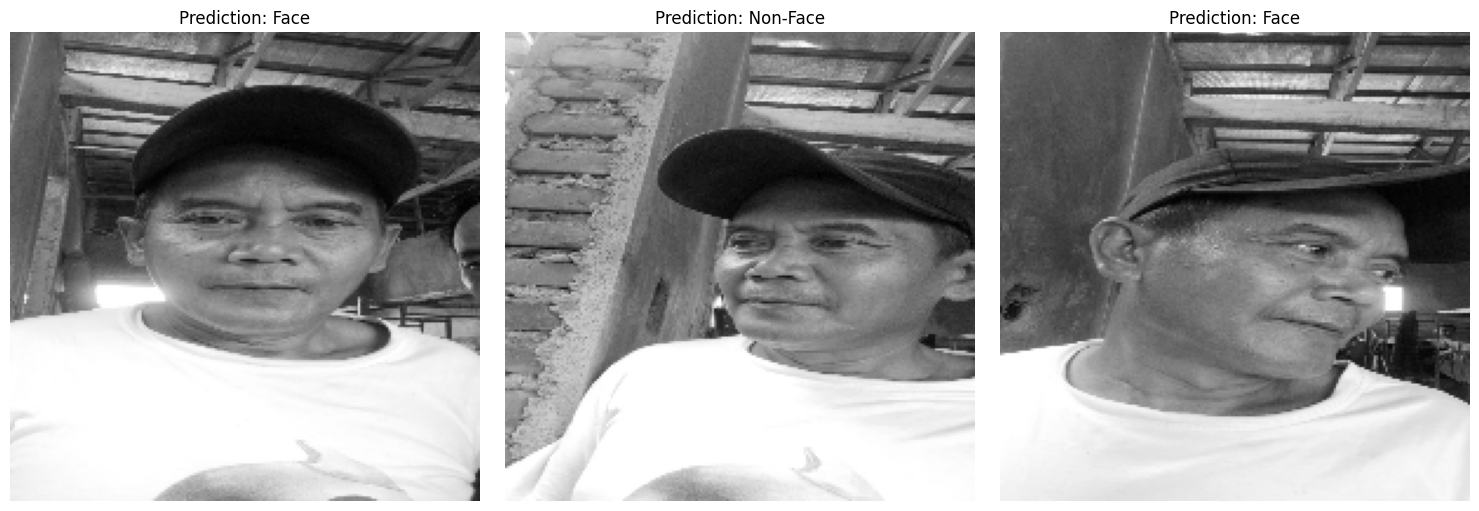

In [11]:
# Fungsi untuk menghitung integral image
def integral_image(img):
    return np.cumsum(np.cumsum(img, axis=0), axis=1)

# Fungsi untuk menghitung Haar feature (kotak putih dan hitam)
def haar_feature(integral_img, x, y, width, height):
    black_region = integral_img[y:y+height, x:x+width//2].sum()  # Kotak hitam
    white_region = integral_img[y:y+height, x+width//2:x+width].sum()  # Kotak putih
    return white_region - black_region

# Fungsi untuk membuat weak classifier
def weak_classifier(feature_value, threshold, polarity):
    """Mengembalikan prediksi (-1 atau +1) berdasarkan threshold dan polarity."""
    if polarity * feature_value < polarity * threshold:
        return 1
    else:
        return -1

# Fungsi untuk menghitung AdaBoost
def adaboost(features, labels, num_classifiers):
    """
    Implementasi sederhana AdaBoost:
    - features: Nilai fitur Haar untuk setiap gambar (N x M, N = jumlah gambar, M = jumlah fitur)
    - labels: Label untuk setiap gambar (+1 untuk wajah, -1 untuk bukan wajah)
    - num_classifiers: Jumlah weak classifiers yang akan digunakan
    """
    n_samples, n_features = features.shape
    weights = np.ones(n_samples) / n_samples  # Bobot awal, sama rata
    classifiers = []  # Simpan weak classifiers
    alpha_values = []  # Simpan bobot weak classifiers

    for _ in range(num_classifiers):
        # Normalisasi bobot
        weights /= np.sum(weights)

        # Pilih weak classifier terbaik berdasarkan error terkecil
        best_classifier = None
        best_error = float('inf')
        best_polarity = None
        best_threshold = None

        for feature_idx in range(n_features):
            feature_column = features[:, feature_idx]
            thresholds = np.unique(feature_column)  # Threshold kandidat
            for threshold in thresholds:
                for polarity in [-1, 1]:  # Dua kemungkinan polaritas
                    predictions = np.array([weak_classifier(f, threshold, polarity) for f in feature_column])
                    error = np.sum(weights * (predictions != labels))

                    if error < best_error:
                        best_error = error
                        best_classifier = feature_idx
                        best_polarity = polarity
                        best_threshold = threshold

        # Hitung bobot alpha untuk weak classifier
        alpha = 0.5 * np.log((1 - best_error) / max(best_error, 1e-10))

        # Simpan weak classifier
        classifiers.append((best_classifier, best_polarity, best_threshold))
        alpha_values.append(alpha)

        # Update bobot sampel
        feature_column = features[:, best_classifier]
        predictions = np.array([weak_classifier(f, best_threshold, best_polarity) for f in feature_column])
        weights *= np.exp(-alpha * labels * predictions)

    return classifiers, alpha_values

# Fungsi untuk membuat prediksi akhir dengan menggunakan weak classifiers
def predict_with_adaboost(image_features, classifiers, alpha_values):
    """Membuat prediksi berdasarkan weak classifiers yang telah dilatih."""
    prediction = 0
    for classifier, alpha in zip(classifiers, alpha_values):
        feature_idx, polarity, threshold = classifier
        feature_value = image_features[feature_idx]
        prediction += alpha * weak_classifier(feature_value, threshold, polarity)

    return 1 if prediction >= 0 else -1

# Data Fitur Haar dari Gambar yang Sudah Diproses
features = []
labels = []

# Menghitung Fitur Haar untuk Setiap Gambar Grayscale
for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Contoh koordinat dan dimensi area Haar
    haar_features_for_image = []
    for x, y, width, height in [(50, 50, 100, 50), (30, 30, 60, 30), (70, 70, 80, 40)]:
        feature_value = haar_feature(int_img, x, y, width, height)
        haar_features_for_image.append(feature_value)

    features.append(haar_features_for_image)
    # Tambahkan label: +1 untuk wajah, -1 untuk bukan wajah (ganti sesuai dataset Anda)
    labels.append(1 if i % 2 == 0 else -1)  # Contoh label dummy

# Konversi ke Numpy Array
features = np.array(features)
labels = np.array(labels)

# Jalankan AdaBoost
classifiers, alpha_values = adaboost(features, labels, num_classifiers=3)

# Output Classifiers
for i, (classifier, alpha) in enumerate(zip(classifiers, alpha_values)):
    print(f"Weak Classifier {i+1}: Feature Index={classifier[0]}, Polarity={classifier[1]}, Threshold={classifier[2]}, Alpha={alpha}")

# Menampilkan gambar dengan prediksi yang benar menggunakan gambar grayscale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Menyiapkan 3 kolom

for i, (img_original, img_gray) in enumerate(preprocessed_images):
    # Hitung Integral Image
    int_img = integral_image(img_gray)

    # Hitung Fitur Haar untuk Gambar ini
    haar_features_for_image = []
    for x, y, width, height in [(50, 50, 100, 50), (30, 30, 60, 30), (70, 70, 80, 40)]:
        feature_value = haar_feature(int_img, x, y, width, height)
        haar_features_for_image.append(feature_value)

    image_features = np.array(haar_features_for_image)

    # Prediksi dengan AdaBoost
    prediction = predict_with_adaboost(image_features, classifiers, alpha_values)

    # Menentukan label prediksi: Wajah atau Non-Wajah berdasarkan hasil prediksi
    if prediction == 1:
        result = "Face"
    else:
        result = "Non-Face"

    # Menampilkan gambar grayscale dengan hasil prediksi yang benar
    axes[i].imshow(img_gray, cmap='gray')  # Menampilkan gambar grayscale
    axes[i].set_title(f"Prediction: {result}")
    axes[i].axis('off')

plt.tight_layout()  # Memastikan tampilan gambar rapi
plt.show()


**10. DETEKSI WAJAH**

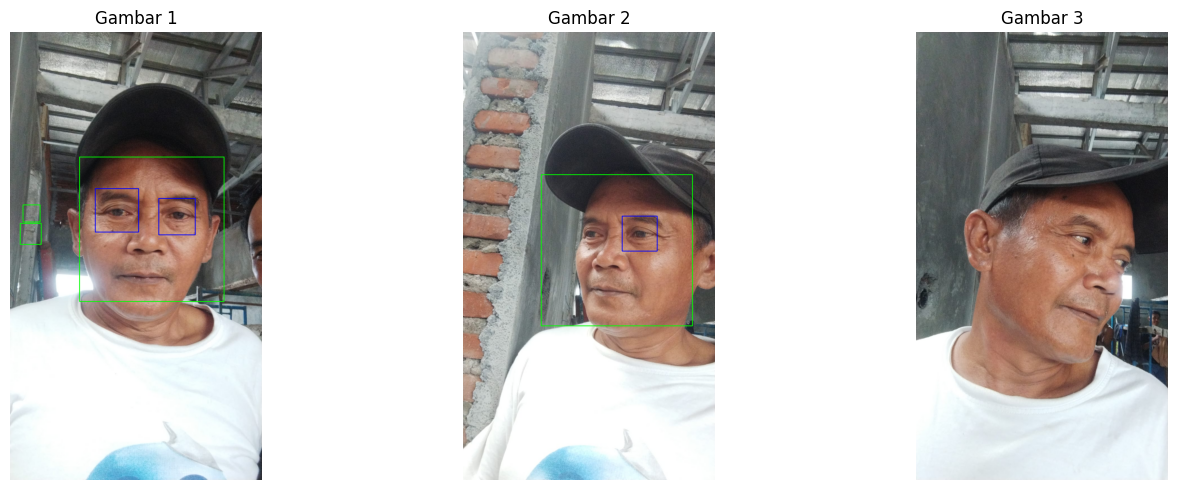

In [19]:
import cv2
import matplotlib.pyplot as plt

# Memuat model Haar Cascade untuk wajah dan mata
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Validasi model Haar Cascade
if face_cascade.empty():
    print("Error: Model Haar Cascade untuk wajah gagal dimuat.")
if eye_cascade.empty():
    print("Error: Model Haar Cascade untuk mata gagal dimuat.")

# Menampilkan hasil deteksi untuk beberapa gambar pertama
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Membuat satu baris dengan 3 kolom
for idx, img_path in enumerate(image_files[:3]):  # Menampilkan 3 gambar pertama
    # Membaca gambar
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Mengubah ke grayscale

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

    # Iterasi untuk setiap wajah yang terdeteksi
    for (x, y, w, h) in faces:
        # Gambar kotak hijau di sekitar wajah
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Area wajah untuk mendeteksi fitur lain
        roi_gray = gray_img[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        # Deteksi mata
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)  # Kotak biru untuk mata

    # Menampilkan hasil deteksi di subplot
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk ditampilkan
    axes[idx].imshow(img_rgb)
    axes[idx].set_title(f"Gambar {idx + 1}")
    axes[idx].axis('off')

# Menampilkan semua gambar dalam satu baris
plt.tight_layout()
plt.show()
